In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('climate_action_data.csv')

# Inspecting
print(df.head())
print('\n') #for space between the print statements
print(df.info()) 
print('\n')




  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2       IMG-2002  
3       IMG-2003

In [7]:
print(df.describe())

       Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C)  \
count        913         909              913     913            913   
unique       800         798              750     313            170   
top     SEN-1779  2026-01-02            error    7.54           19.1   
freq           2           2                5      11             13   

       Humidity(%) Crop_Type Fertilizer_Recommended(kg/ha)  \
count          913       909                           913   
unique         448         5                           595   
top           56.0     Wheat                          66.9   
freq             8       203                             8   

       Irrigation_Recommended(mm) Drone_Image_ID  
count                         913            913  
unique                        243            800  
top                           8.0       IMG-2779  
freq                           11              2  


In [8]:
df.shape

(913, 10)

In [9]:
print(df.dtypes)

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object


In [10]:
#  missing values
print("Missing values in each colomn")
df.isnull().sum()

Missing values in each colomn


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [12]:
# Handle missing values

# numerical columns - filled with median
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
               'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, handle 'error' values
        df[col] = df[col].fillna(df[col].median())

# categorical columns - filled with mode
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Check for remaining missing values
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [13]:
# Data in Wrong Format
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Handle empty Crop Type using MODE 
crop_mode = df['Crop_Type'].mode()[0]  # Get the most frequent crop
df['Crop_Type'] = df['Crop_Type'].replace('', pd.NA)  # Replace empty strings with NA
df['Crop_Type'] = df['Crop_Type'].fillna(crop_mode)   # Fill missing crops with mode
# Inspection
print(df.info()) 
print('\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      913 non-null    object        
 1   Date                           909 non-null    datetime64[ns]
 2   Soil_Moisture(%)               913 non-null    float64       
 3   Soil_pH                        913 non-null    float64       
 4   Temperature(C)                 913 non-null    float64       
 5   Humidity(%)                    913 non-null    float64       
 6   Crop_Type                      913 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  913 non-null    float64       
 8   Irrigation_Recommended(mm)     913 non-null    float64       
 9   Drone_Image_ID                 913 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 71.5+ KB
None


            

In [14]:
# Wrong Data Types
sensor_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
              'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

for col in sensor_cols:
    if col in df.columns:
       # Remove extreme outliers (beyond 3 standard deviations)
       mean = df[col].mean()
       std_dev = df[col].std()
       df[col] = df[col].apply(lambda x: x if (mean - 3 * std_dev < x < mean + 3 * std_dev) else np.nan)
       # Fill NaN values in price columns with the median
       df[col] = df[col].fillna(df[col].median())
# Check data types after conversion
print("Data types after conversion:")   
print(df.dtypes)

Data types after conversion:
Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object


In [15]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 111


In [18]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])

# Check for duplicate dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())

# Remove duplicate dates (keeping first occurrence)
df = df.drop_duplicates(subset=['Date'], keep='first')
# Shape
df.shape

Number of rows after removing duplicates: 799
Number of duplicate dates: 0


(799, 10)

In [19]:
# Final clean dataset
df.info()

# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
Missing values after all

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

In [21]:
# Converting Date to real date, not string
df['Date'] = pd.to_datetime(df['Date'])

# Converting numeric columns to real number, not string
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

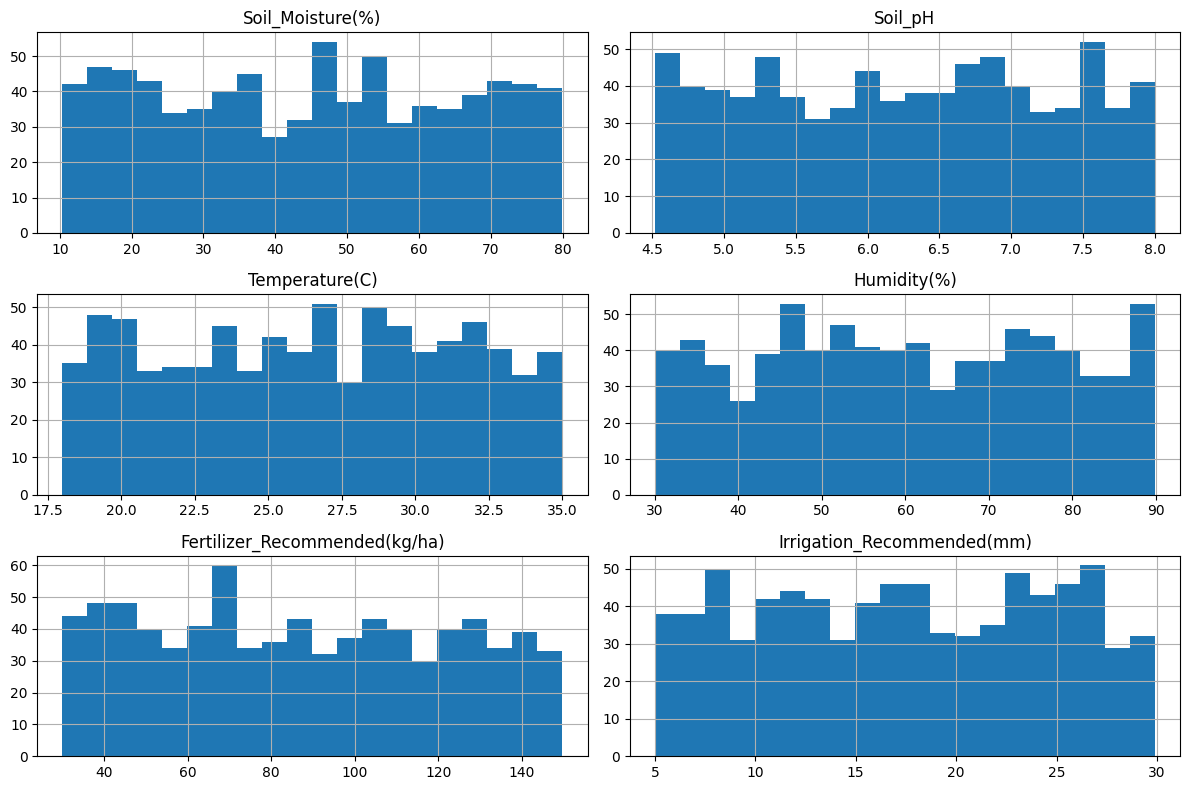

In [22]:
# Plotting histograms
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()



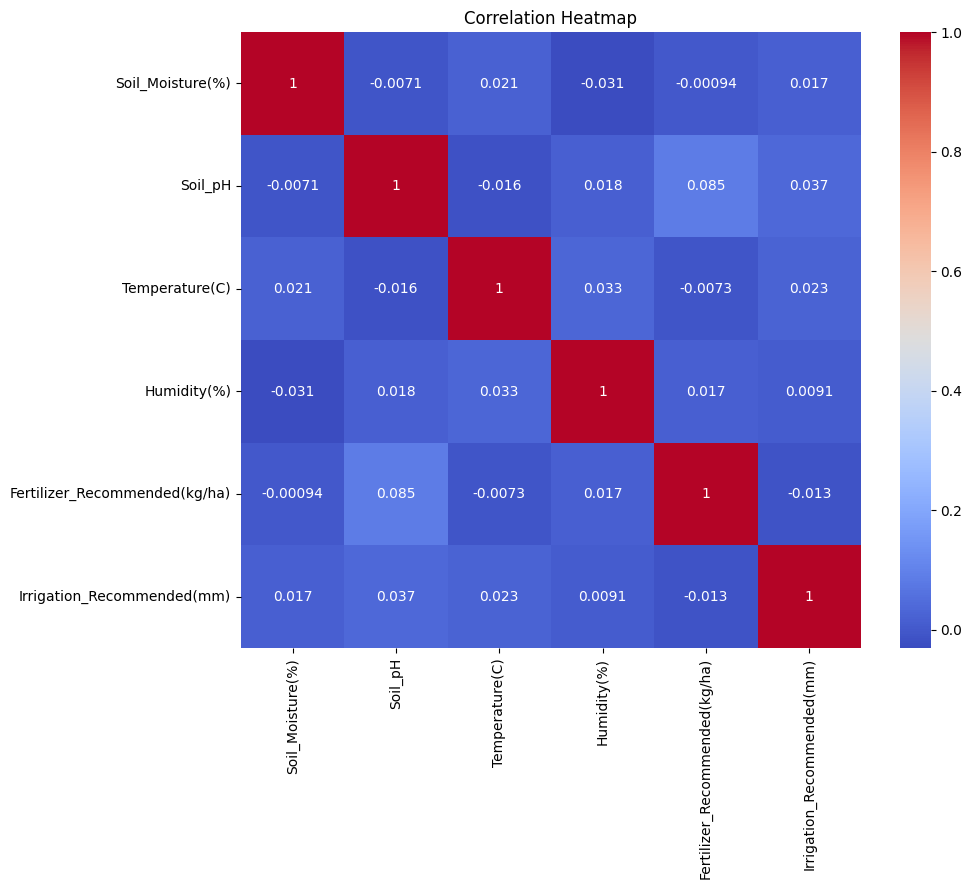

In [23]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

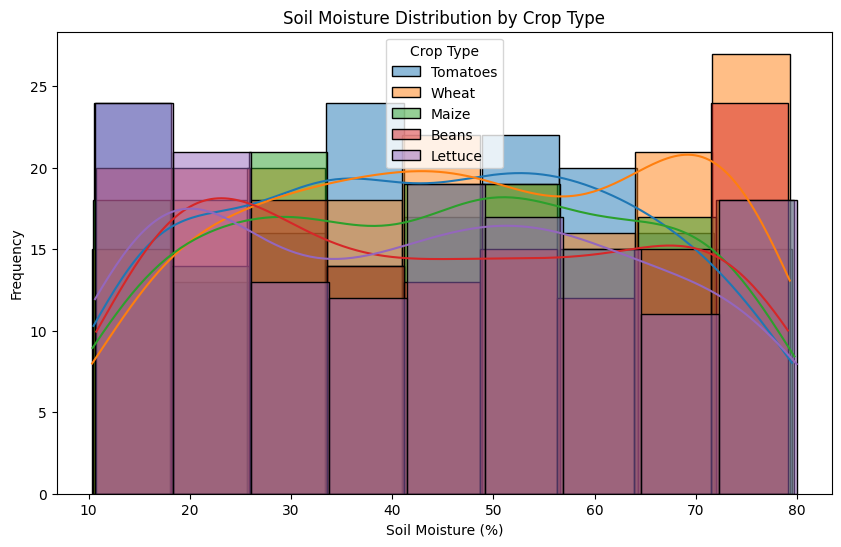

Wheat


In [24]:
plt.figure(figsize=(10, 6))
for crop in df['Crop_Type'].unique():
    sns.histplot(data=df[df['Crop_Type'] == crop], 
                 x='Soil_Moisture(%)', 
                 label=crop,
                 alpha=0.5,  # Makes overlapping areas visible
                 kde=True)   # Adds smoothed distribution line
    
plt.title('Soil Moisture Distribution by Crop Type')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Frequency')
plt.legend(title='Crop Type')
plt.show()

# Crop with highest average Soil_Moisture
print(df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax())

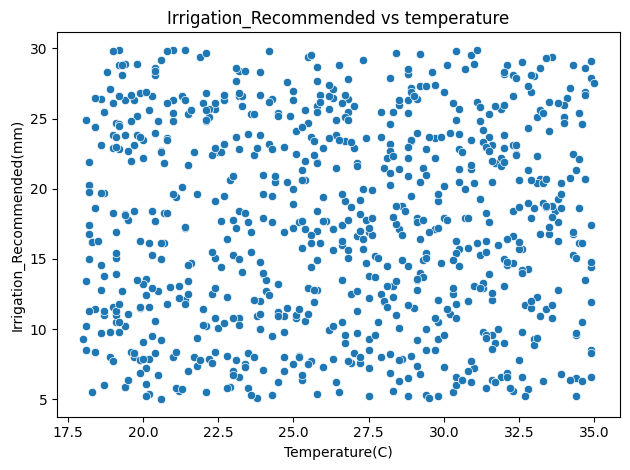

In [25]:
# Analysing irrigation recommended against temperature, to make recommendations
sns.scatterplot(x='Temperature(C)', y='Irrigation_Recommended(mm)', data=df)
plt.title('Irrigation_Recommended vs temperature')
plt.tight_layout()
plt.show()

In [26]:
# Saving to new CSV
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)

In [ ]:
# Insights

# - The dataset consists of 10 fields; Sensor_ID, Date, Soil_Moisture, Soil_pH, Temperature, Humidity, Crop_Type, Fertilizer_Recommended, Irrigation_Recommended, Drone_Image_ID
# - The fields with missing values are Date and Crop_Type
# - All the fields have mixed types, so they appear as "object" from pandas, but their expected types, from insepection of the first 5 rows, are;
# Sensor_ID- String, Date- date, Soil_Moisture- Numeric, Soil_pH- Numeric, Temperature- Numeric, Humidity- Numeric, Crop_Type- String,Fertilizer_Recommended- Numeric
# Irrigation_Recommended- Numeric, Drone_Image_ID- String
# - Since Crop_Type is a major field, any row that has a null value of Crop_Type is replaced by the mode.
# - According to the dataset, the Date fields increase in ascending order, so the rows whose Date field is null can have their value logically implied based on the next row's Date field
# - From the correlation heatmap, it is seen that Soil ph and humidity are the most influential variables on fertiliser recommendations.
# - To find the crop-type with the highest average soil moisture, a Histogram was made, showing the different crop types and their averages, and quartile values. The resultant highest was Wheat.
# - A scatterplot of Irrigation recommendation against Temperature shows that there is uniform dispersion of recommended amount of millimeters across all temperatures; there is no correlation between temperature and Irrigation recommendation, so a  high temperature does not imply that there is need for recommendation of more millimeters of irrigation liquid.                                                    
# - The cleaned and processed data can now be saved as cleaned_precision_agriculture_data.csv for future use.                                              
                                                   
# Soil and Environmental Variable Correlation Analysis
# A correlation heatmap and statistical metrics identified Soil_pH and Humidity(%) as the most influential environmental variables affecting fertilizer and irrigation recommendations, respectively.

# Recommendations for Future Work
# Model Improvement: Test advanced machine learning models (e.g., Random Forest, Gradient Boosting) to predict irrigation and fertilizer needs.
# Feature Engineering: Add derived metrics such as Soil Moisture Deficit (target vs. actual) and crop-specific pH thresholds to enhance model performance.
# Time Series Analysis: Analyze seasonal patterns in soil properties and environmental conditions across crop cycles to better time interventions.
# Field Validation: Backtest the data-driven recommendations using historical crop yield data to assess accuracy and effectiveness.
# Real-time Data Integration: Use IoT sensor networks for real-time monitoring and adaptive recommendation generation.
# Visual Dashboards: Develop dashboards to track soil conditions, issue alerts for fertilizer and irrigation needs, and visualize trends in real-time.

